

# Parameter estimation by linear regression

The rate constants in rate laws generally must be determined from experiments. 

We typically fit models to experimental data, and derive the rate constants from the fitted parameters. There are two general types of fitting:  linear regression and nonlinear regression.

-   **Linear regression:** fitting models that are linear in the parameters

Example: $y(x) = m x + b$ is linear in $m$ and $b$.

-   **Nonlinear regression:** fitting models that are nonlinear in the parameters

Example: $C_A(t) = C_{A0} \exp(-k t)$ is linear in $C_{A0}$ but nonlinear in $k$.

In either case we want to estimate the value of the parameters in the model, and the uncertainty in the parameters.


## Linear regression review

In linear regression we fit a model that is linear in the parameters to some data.

The model parameters may be directly useful, e.g. the slope of a line may be related to a rate constant, or we may use the model to derive something, e.g. the derivative at some value.

A linear model is one like:
$ y = p_0 + p_1 f_1(x) + p_2 f_2(x) + \cdots $

Here the parameters are $p_i$ and the model is linear in them. The functions $f_i(x)$ do not have to be linear. Some examples are:

-   $ y = p_0 + p_1 x $ - a line
-   $ y = p_0 + p_1 x + p_2 x^2 $ - a parabola
-   $ y = p_0 + p_1 e^x $
-   We will write these in the general matrix algebra form:

$ \bf{y} = \bf{X} \bf{p} $

where:

\begin{equation}
\bf{y} = \left [
\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n\\
\end{array}
\right ]
\end{equation}

\begin{equation}
\bf{X} = \left [ \begin{array}{cccc}
f_n(x_1) & \cdots & f_1(x_1) & 1 \\
f_n(x_2) & \cdots & f_1(x_2) & 1 \\
\vdots & \vdots   & \vdots   & \vdots \\
f_n(x_n) & \cdots & f_1(x_n) & 1 \\
\end{array}
\right ]
\end{equation}

and $ \bf{p} = \left [\begin{array}{c}p_n \\ p_{n-1} \\ \vdots \\ p_0 \end{array} \right ]  $

The model will usually not fit data perfectly, so we modify the model to include the errors

$\bf{y} = \bf{X} \bf{p} + \bf{e} $

-   We want the best estimate for **p**, which means we want the  **p** that minimizes the error in the least squares sense (that is the magnitude of the sum of squared errors is minimized)

The best estimate for **p** is:

$ \bf{p} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T \bf{y} $

There will typically be errors between the data and model with corresponding uncertainty in the estimated parameters

We need to quantify the uncertainty to determine how important it is in reactor design.

Let us consider an example. We want to fit a line to the following data. The line has an equation $y = p_0 x + p_1$.

-   Remember

$ \bf{p} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T \bf{y} $

Here we solve a prototypical problem of fitting a line to some data. We are given some x and y data, and we want to fit a line.

First, we need a little primer on working with arrays and linear algebra.

To stack two 1-D arrays into a matrix, we can either stack them as rows, or columns.



In [2]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

To get a new array that has two rows in it use [numpy.row_stack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.row_stack.html).



In [3]:
print(np.row_stack([a, b]))

[[1 2 3]
 [4 5 6]]


To get a new array with two columns, use [numpy.column_stack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html)



In [4]:
print(np.column_stack([a, b]))

[[1 4]
 [2 5]
 [3 6]]


You can transpose one to get the other.



In [6]:
print(np.row_stack([a, b]).T)

[[1 4]
 [2 5]
 [3 6]]


We will need arrays that contain all ones. Here are a few easy ways to get them.



In [10]:
o1 = a**0  # raise each element to the zeroth power
o2 = np.ones(a.size)

print(o1, o2)
print(o1 * 2, o2 / 2)

[1 1 1] [ 1.  1.  1.]
[2 2 2] [ 0.5  0.5  0.5]


Note that one is an array of integers, and one is an array of floats. For the work we do here the difference is not important, but sometimes it could be important.

We need to take the dot product of two arrays. Use [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) for this. For example:



In [17]:
#print(np.dot(a, b))
#print(a, b)
# or with Python 3.5 or higher
# print(a @ b)

a = [2, 3]
b = [4, 5]
print(np.dot(np.row_stack([a, b]), np.row_stack([a, b])))
print(np.row_stack([a, b]) @ np.row_stack([a, b])) # matrix multiplication
print('ewise: \n', np.row_stack([a, b]) * np.row_stack([a, b])) # elementwise multiplication

[[16 21]
 [28 37]]
[[16 21]
 [28 37]]
ewise: 
 [[ 4  9]
 [16 25]]


Finally, we will have to take the inverse of a square matrix. We use [numpy.linalg.inv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html) for that.



In [20]:
from numpy.linalg import inv

print(inv([[1, 2], 
           [3, 4]]))

[[-2.   1. ]
 [ 1.5 -0.5]]


With those new commands, we are ready to do a linear regression. We are given this data:



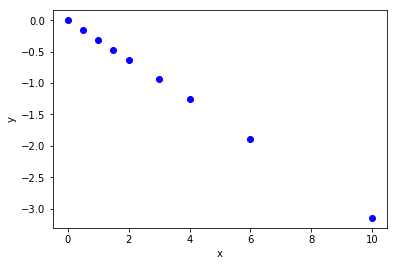

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.array([0, 0.5, 1, 1.5, 2.0, 3.0, 4.0, 6.0, 10])
y = np.array([0, -0.157, -0.315, -0.472, -0.629, -0.942, -1.255, -1.884, -3.147])
plt.plot(x, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')

You can see it looks pretty linear, so we will fit a line to it. According to our equations, we need to construct an array where one column is the x-values and one column is ones. Those correspond to the parameters $m x$ and $b$.



In [24]:
X = np.column_stack([x, x**0])
print(X.T @ X)

[[ 168.5   28. ]
 [  28.     9. ]]


p2:  [-0.31452218  0.00062457]
The slope is -0.3145221843003412 and intercept is 0.0006245733788392549


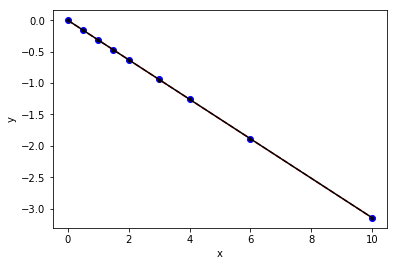

In [31]:
# p = (X.T X)^{-1} X.T y
#  I find these intermediate variables make it easier to read
XTX = np.dot(X.T, X)
XTy = np.dot(X.T, y)

p = np.dot(np.linalg.inv(XTX), XTy)

print('p2: ',np.linalg.inv(X.T @ X) @ X.T @ y)

slope, intercept = p # note the order in X
print('The slope is {0} and intercept is {1}'.format(slope, intercept))

# plot data and fit
plt.plot(x, y, 'bo')
plt.plot(x, np.dot(X, p), 'r--')
plt.plot(x, slope * x + intercept, 'k.-')
plt.xlabel('x')
plt.ylabel('y')

You should always plot the fitted function over the data to visually assess the quality of the fit.

The error in the fit is defined as: $\bf{e} = \bf{y} - \bf{X}\cdot \bf{p}$.  We can compute the summed squared error as $SSE = \bf{e} \cdot \bf{e}$.  We define $SST = \sum (\bf{y} - \overline{y})^2 = (\bf{y} - \overline{y})\cdot(\bf{y} - \overline{y})$

We can use that to compute $R^2 = 1 - SSE/SST$ which roughly corresponds to the fraction of variance in the data explained by the model. Let us calculate the R^2 value.



In [1]:
import pprint
e = y - np.dot(X,p)
pprint.pprint(e)

SSE = np.dot(e, e)

yb = y - np.mean(y)
SST = np.dot(yb, yb)
Rsq = 1 - SSE/SST

print('R-squared = {0} '.format(Rsq))

array([-0.00062457, -0.00036348, -0.00110239, -0.0008413 , -0.0005802 ,
        0.00094198,  0.00246416,  0.00250853, -0.00240273])
R-squared = 0.9999972914903201

The R^2 tells you how much of the variation in the data is explained by the model. A value of 1 tells you all the variation is explained. Values less than one means the model is incomplete in some way. Here the value is close to one, which suggests a good fit.


# Polynomial fitting

If you are just interested in fitting a polynomial, there are easier ways. 

1.  [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)



In [34]:
x = np.array([0, 0.5, 1, 1.5, 2.0, 3.0, 4.0, 6.0, 10])
y = np.array([0, -0.157, -0.315, -0.472, -0.629, -0.942, -1.255, -1.884, -3.147])

p = np.polyfit(x, y, 1)
print(p)

[ -1.47316293e-04  -3.13082708e-01  -1.09570886e-03]


It is also easy to evaluate the fitted polynomial at data points with [numpy.polyval](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyval.html)



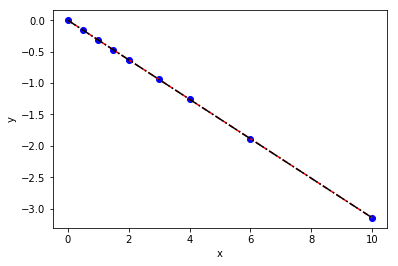

In [33]:
plt.plot(x, y, 'bo ')

# evaluate the fit on the original fitted data
plt.plot(x, np.polyval(p, x), 'r--')

# evaluate the fit on an array of values
xfit = np.linspace(0, 10)
yfit = np.polyval(p, xfit)
plt.plot(xfit, yfit, 'k-.')

plt.xlabel('x')
plt.ylabel('y')


# Uncertainty in parameter estimation

It is important to consider the uncertainty on the parameters.  pycse has a [pycse.regress](https://www.google.com/#safe=off&q=pycse.regress) function for that.  We specify a confidence level, typically 95%, &alpha; = (100 - %confidence level)/100

Note if you get an error about not having pycse you may need to run this block:



In [1]:
!pip install pycse==1.6.3

  Found existing installation: pycse 0.6.2
    Can't uninstall 'pycse'. No files were found to uninstall.


In [35]:
from pycse import regress

# Choose 95% confidence level
alpha = 1 - 0.95
p, pint, se = regress(X, y, alpha)
slope_interval, intercept_interval = pint

print('The slope is between {0} \n'
      'at the 95% confidence level'.format(slope_interval))

print('The intercept is between {0} \n'
      'at the 95% confidence level'.format(intercept_interval))

The slope is between [-0.31500091 -0.31404346] 
at the 95% confidence level
The intercept is between [-0.00144683  0.00269598] 
at the 95% confidence level


Note in this case that the second parameter includes 0.  We cannot conclude that this parameter is significant.  A simpler model with the intercept fixed at 0 might be better.

The size of the confidence intervals depends on the number of data points, the number of estimated parameters, and the confidence level.

Read the [regress](https://github.com/jkitchin/pycse/blob/master/pycse/PYCSE.py#L7) source code to learn how the confidence intervals are calculated.


# Applications in determining a rate constant and reaction order

Rate constants and reaction orders are determined by using models that are fit to experimental data.  A common case is to monitor concentration vs. time in a constant volume, batch reactor.  We consider the disappearance of $A$.

From the mole balance we know:
$\frac{dN_A}{dt} = r_A V$

Let us assume the rate law is of the form: $r = k C_A^\alpha$ and a constant volume so that:
$\frac{dC_A}{dt} = -k C_A^\alpha $

Note in this example that the derivative is linear in $k$ and nonlinear in &alpha;.

Let us be loose with mathematics, rearrange the equation, and take the log of both sides. By loose I mean we take logs of quantities that are not dimensionless, and the log of a dimension is not really defined.

$ \ln(-\frac{dC_A}{dt}) = \ln{k} + \alpha \ln C_A $

Now, we have a function that is linear in &alpha;, and linear in $\ln k$.

This suggests that if we could numerically compute $\frac{dC_A}{dt}$ from our data of $C_A(t)$ then a plot of the log of the negative derivative vs the log of concentration would have an intercept equal to the log of the rate constant, $k$, and a slope equal to the reaction order $\alpha$.

Given the following data, determine the reaction order in A and the rate constant with 95% confidence intervals. 

We will use the [pycse.deriv](https://www.google.com/#safe=off&q=pycse.deriv) function to numerically compute centered 2-point finite difference approximations to the derivatives. This works best when the $x$ points are evenly spaced, and they should be monotically increasing or decreasing.

Read the [deriv](https://github.com/jkitchin/pycse/blob/master/pycse/PYCSE.py#L182) source code to learn how the derivatives are approximated, and what options are available.



In [37]:
np.set_printoptions(precision=3)  # alternate approach to printing accuracy
from pycse import deriv, regress

t = [0, 50, 100, 150, 200, 250, 300]
Ca = [0.05, 0.038, 0.0306, 0.0256, 0.0222, 0.0195, 0.0174]

# calculate numerical derivatives
dCadt = deriv(t, Ca)
print(dCadt)

[ -2.400e-04  -1.940e-04  -1.240e-04  -8.400e-05  -6.100e-05  -4.800e-05
  -4.200e-05]


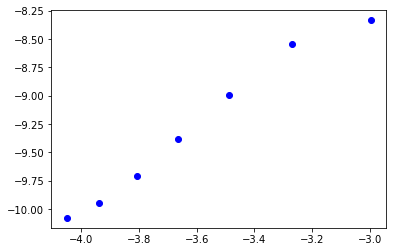

In [39]:
# do the transformation
x = np.log(Ca)
y = np.log(-dCadt)
plt.plot(x, y, 'bo')

In [40]:
# setup and do the regression
# column of ones and x:  y = b + mx
X = np.column_stack([x**0, x])

p, pint, se = regress(X, y, 0.05)
print(pint)

[[-3.95  -1.725]
 [ 1.482  2.097]]


-r_A = 0.06 C_A^1.79
alpha = [ 1.482  2.097] at the 95% confidence level
k = [ 0.019  0.178] at the 95% confidence level


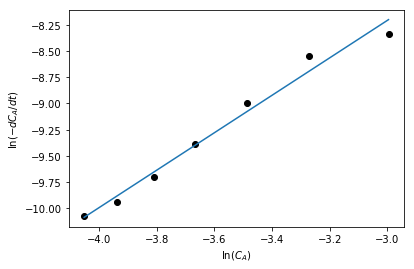

In [41]:
intercept_range = pint[0]
alpha_range = pint[1]

k_range = np.exp(intercept_range)

k, alpha = np.exp(p[0]), p[1]
print('-r_A = {:1.2f} C_A^{:1.2f}'.format(k, alpha))
print('alpha = {0} at the 95% confidence level'.format(alpha_range))
print('k = {0} at the 95% confidence level'.format(k_range))

# always visually inspect the fit
plt.plot(x, y,'ko ')
plt.plot(x, np.dot(X, p))
plt.xlabel('$\ln(C_A)$')
plt.ylabel('$\ln(-dC_A/dt)$')

You can see there is a reasonably large range of values for the rate constant and reaction order (although the confidence interval does not contain zero)

There is uncertainty in the data.  In each concentration measurement there is uncertainty in the time and value of concentration. You need more data to reduce the uncertainty. You may also need better data to reduce the uncertainty.

Derivatives tend to *magnify* errors in data.  The method we used to fit the data contributed to the uncertainty. We also *nonlinearly* transformed the errors by taking logs and exp of the data and results, which may have skewed the confidence limits.


# Summary points

We often try to use linear regression because once you formulate the expression, determining the parameters is done easily with linear algebra.

However, sometimes we have to use nonlinear transformations of the data to get a linear regression formulation, and this can skew the errors.

There are several new Python commands to get familiar with in this lecture.

1.  [numpy.column_stack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html)  - stack 1-D arrays as columns
2.  [numpy.row_stack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.row_stack.html) - stack 1-D arrays as rows
3.  [numpy.linalg.inv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html) - inverse of a square matrix
4.  [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) - dot product
5.  [numpy.ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) - make an array of ones
6.  [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) - fit a polynomial to data
7.  [numpy.polyval](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyval.html) - evaluate a fitted polynomial at data points
8.  [pycse.deriv](https://www.google.com/#safe=off&q=pycse.deriv) - Compute numerical derivatives
9.  [pycse.regress](https://www.google.com/#safe=off&q=pycse.regress) - linear regression with uncertainty

